In [1]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
# Read the labels.csv file and checking shape and records
labels_all = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [5]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [6]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('dog-breed-identification/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:00<00:00, 432.29it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [11]:
Y_data[8]

array([0, 0, 1])

In [12]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 8)        

In [13]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [14]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Train on 256 samples, validate on 65 samples
Epoch 1/100
256/256 [==============================] - 71s 275ms/step - loss: 4.8859 - accuracy: 0.3633 - val_loss: 4.8725 - val_accuracy: 0.3077
Epoch 2/100
256/256 [==============================] - 68s 264ms/step - loss: 4.8586 - accuracy: 0.3633 - val_loss: 4.8478 - val_accuracy: 0.3077
Epoch 3/100
256/256 [==============================] - 67s 263ms/step - loss: 4.8324 - accuracy: 0.3633 - val_loss: 4.8237 - val_accuracy: 0.3077
Epoch 4/100
256/256 [==============================] - 67s 262ms/step - loss: 4.8060 - accuracy: 0.3633 - val_loss: 4.7998 - val_accuracy: 0.3077
Epoch 5/100
256/256 [==============================] - 66s 259ms/step - loss: 4.7800 - accuracy: 0.3633 - val_loss: 4.7758 - val_accuracy: 0.3077
Epoch 6/100
256/256 [==============================] - 66s 259ms/step - loss: 4.7540 - accuracy: 0.3633 - val_loss: 4.7519 - val_accuracy: 0.3231
Epoch 7/100
256/256 [==============================] - 65s 256ms/step - loss: 4

256/256 [==============================] - 65s 255ms/step - loss: 3.2760 - accuracy: 0.8594 - val_loss: 3.7663 - val_accuracy: 0.6154
Epoch 57/100
256/256 [==============================] - 84s 327ms/step - loss: 3.2558 - accuracy: 0.8633 - val_loss: 3.8008 - val_accuracy: 0.6308
Epoch 58/100
256/256 [==============================] - 65s 254ms/step - loss: 3.2342 - accuracy: 0.8711 - val_loss: 3.8007 - val_accuracy: 0.5846
Epoch 59/100
256/256 [==============================] - 112s 437ms/step - loss: 3.2129 - accuracy: 0.8789 - val_loss: 3.7969 - val_accuracy: 0.5846
Epoch 60/100
256/256 [==============================] - 69s 268ms/step - loss: 3.1936 - accuracy: 0.8789 - val_loss: 3.7756 - val_accuracy: 0.6000
Epoch 61/100
256/256 [==============================] - 67s 261ms/step - loss: 3.1709 - accuracy: 0.8711 - val_loss: 3.7782 - val_accuracy: 0.5846
Epoch 62/100
256/256 [==============================] - 67s 261ms/step - loss: 3.1513 - accuracy: 0.8789 - val_loss: 3.8176 - val_

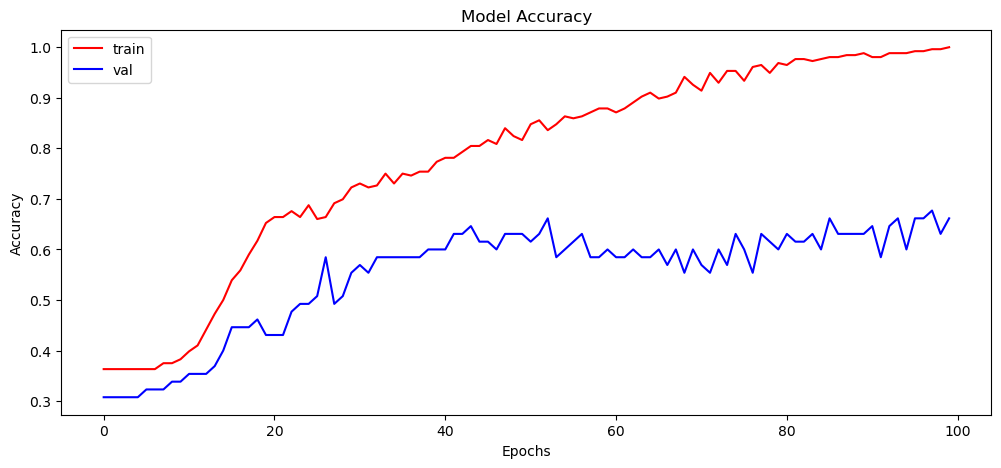

In [15]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [16]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

36/36 [==============================] - 4s 99ms/step
Accuracy over the test set: 
  63.89 %


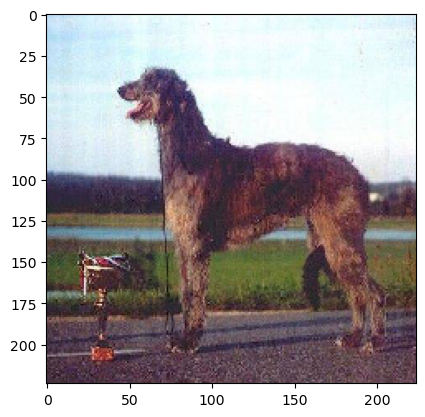

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [17]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [19]:
import pickle

In [20]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

### Conclusive

#### We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.